# House Price dataset : Model Building

In this notebook, we will use Regularised Linear Regression - Lasso to predict our target variable. We will use MSE, RMSE and R2 for evaluation. We will also look at feature importance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
X_train=pd.read_csv('xtrain.csv')
X_test=pd.read_csv('xtest.csv')

In [3]:
y_train=X_train['SalePrice']
y_test=X_test['SalePrice']

In [7]:
features=pd.read_csv('selected_features.csv')
features=features['0'].to_list()
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive']

In [9]:
X_train=X_train[features]
X_test=X_test[features]

print(X_train.head())
print(X_test.head())

   MSSubClass  MSZoning  Neighborhood  OverallQual  OverallCond  YearRemodAdd  \
0    0.000000      0.75      0.863636     0.777778         0.50      0.950000   
1    0.000000      0.75      0.363636     0.444444         0.75      0.933333   
2    0.588235      0.75      1.000000     0.888889         0.50      0.916667   
3    0.000000      0.75      0.500000     0.666667         0.50      0.800000   
4    0.000000      0.75      0.363636     0.555556         0.50      0.233333   

   BsmtQual  BsmtExposure  HeatingQC  CentralAir  1stFlrSF  GrLivArea  \
0      0.75          0.75       1.00         1.0  0.559760   0.523250   
1      0.50          0.25       1.00         1.0  0.434539   0.406196   
2      1.00          0.25       1.00         1.0  0.627205   0.586296   
3      0.75          1.00       1.00         1.0  0.566920   0.529943   
4      0.50          0.25       0.75         1.0  0.549026   0.513216   

   BsmtFullBath  KitchenQual  Fireplaces  FireplaceQu  GarageType  \
0    

**Setup the model**

In [10]:
lin_model=Lasso(alpha=0.005,random_state=0)

lin_model.fit(X_train,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

**Predict and Evaluate the model**

In [16]:
pred_train=lin_model.predict(X_train)
print('For Train set -----')
print('MSE:{}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred_train)))))
print('RMSE:{}'.format(int(sqrt(mean_squared_error(np.exp(y_train),np.exp(pred_train))))))
print('Score:{}'.format(r2_score(np.exp(y_train),np.exp(pred_train))))

pred_test=lin_model.predict(X_test)
print('\nFor Test set -----')
print('MSE:{}'.format(int(mean_squared_error(np.exp(y_test),np.exp(pred_test)))))
print('RMSE:{}'.format(int(sqrt(mean_squared_error(np.exp(y_test),np.exp(pred_test))))))
print('Score:{}'.format(r2_score(np.exp(y_test),np.exp(pred_test))))

For Train set -----
MSE:1095546977
RMSE:33099
Score:0.8245393214365632

For Test set -----
MSE:1436186457
RMSE:37897
Score:0.7910124616405935


**Let's plot scatterplot with prediction and real value for evaluation**

Text(0.5, 1.0, 'Evaluation of Lasso prediction')

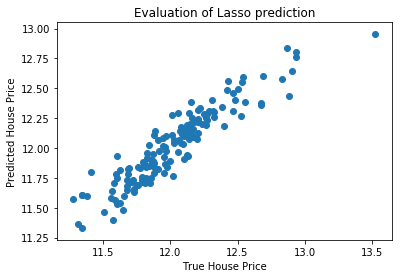

In [18]:
plt.scatter(y_test,pred_test)
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso prediction')


We can see that our model performance is quite good in estimating house price.

**Let's see the distribution of errors**

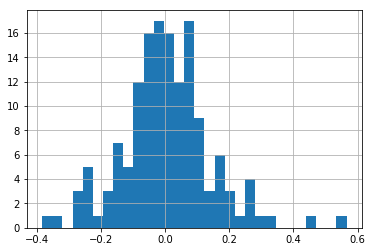

In [19]:
residual=y_test-pred_test
residual.hist(bins=30)

We can see here as well that errors are normally distributed, which suggests that the model performance is good. 

## Feature Importance

Text(0.5, 0, 'Feature Importance')

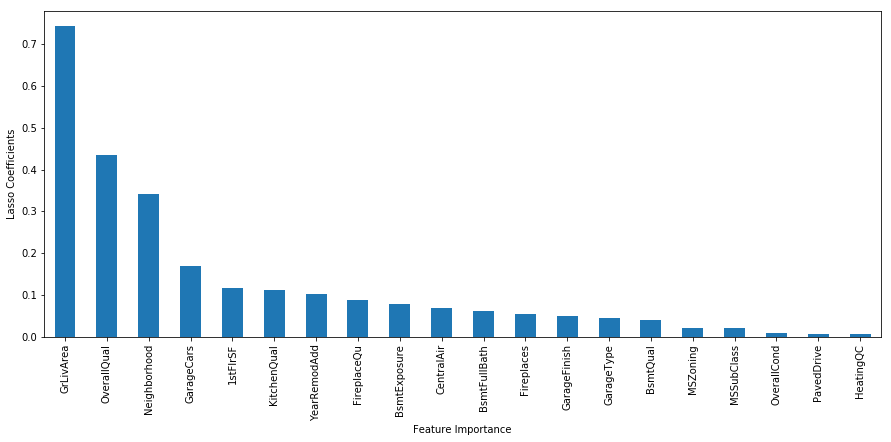

In [20]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index=features
importance.sort_values(ascending=False).plot.bar(figsize=(15,6))
plt.ylabel('Lasso Coefficients')
plt.xlabel('Feature Importance')

Here we can see that GrLivArea,OverallQual and Neighorhood are some of the most important features which impact a house price.